# Initial analysis

In [3]:
# Modules to import
import sys

### Data preprocessing

In [12]:
# Execute dataCleaning.py
# This script create dictionaries of freebase_id, convert date to datetime object, transform our columns

%run src/scripts/dataCleaning.py

Movies successfully loaded
Characters successfully loaded
Clusters successfully loaded
Summaries successfully loaded
Dates successfully converted
Build of countries dictionnary...
Build of languages dictionnary...
Build of genres dictionnary...
Build of actors dictionnary...
Build of character dictionnary...
Build of movies dictionnary...
Dictionnaries successfully saved
Saved movies_cleaned to data/cleanData/movies_cleaned.csv
Saved characters_cleaned to data/cleanData/characters_cleaned.csv
Saved character_clusters_cleaned to data/cleanData/character_clusters_cleaned.csv
Saved summaries_cleaned to data/cleanData/summaries_cleaned.csv
Datasets successfully saved
Data cleaning successfully done


In [4]:
# Import dataloader function
path = 'src/data'
sys.path.append(path)
from dataLoader import loadDataframe

In [5]:
# Load data
path_to_directory = 'data/cleanData/'
df_movies = loadDataframe('movies', path_to_directory)
df_characters = loadDataframe('characters', path_to_directory)
df_clusters = loadDataframe('clusters', path_to_directory)
df_summaries = loadDataframe('summaries', path_to_directory)

KeyboardInterrupt: 

### Data statistics overview

In [15]:
print(df_movies.info())
print(df_characters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   wiki_id                81741 non-null  int64         
 1   freebase_id            81741 non-null  object        
 2   original_title         81741 non-null  object        
 3   release_date           74839 non-null  datetime64[ns]
 4   revenue                8401 non-null   float64       
 5   runtime                61291 non-null  float64       
 6   languages              81741 non-null  object        
 7   countries              81741 non-null  object        
 8   genres                 81741 non-null  object        
 9   countries_freebase_id  81741 non-null  object        
 10  languages_freebase_id  81741 non-null  object        
 11  genres_freebase_id     81741 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory

In [ ]:
df_movies.describe()

,wiki_id,release_date,revenue,runtime
count,8.174100e+04,74838,8.401000e+03,6.129100e+04
mean,1.740784e+07,1977-10-12 11:46:07.610037696,4.799363e+07,1.118192e+02
min,3.300000e+02,1888-01-01 00:00:00,1.000000e+04,0.000000e+00
25%,7.323695e+06,1956-01-01 00:00:00,2.083193e+06,8.100000e+01
50%,1.777899e+07,1985-05-18 12:00:00,1.063969e+07,9.300000e+01
75%,2.715573e+07,2004-01-01 00:00:00,4.071696e+07,1.060000e+02
max,3.750192e+07,2016-06-08 00:00:00,2.782275e+09,1.079281e+06
std,1.098791e+07,NaN,1.121753e+08,4.360070e+03


In [ ]:
print(df_movies.isnull().sum())
print(df_characters.isnull().sum())

wiki_id                      0
freebase_id                  0
name                         0
release_date              6903
revenue                  73340
runtime                  20450
countries_freebase_id        0
languages_freebase_id        0
genres_freebase_id           0
dtype: int64
wiki_id                             0
freebase_id                         0
release_date                    10010
character                      257875
birth_date                     106179
gender                          45609
height                         295845
ethnicity_freebase_id          344611
name                             1228
age                            158113
character_actor_freebase_id         0
character_freebase_id          257865
actor_freebase_id                 815
dtype: int64


In [ ]:
from matplotlib_venn import venn2

def intersectionWikiId(df1, df2, name1, name2, id_column='id'):
    # Ids extraction from each DataFrame
    ids1 = set(df1[id_column].unique())
    ids2 = set(df2[id_column].unique())
    
    # Compute intersection and differences
    intersection = ids1 & ids2
    only_df1 = ids1 - ids2
    only_df2 = ids2 - ids1
    
    # Count elements
    count_intersection = len(intersection)
    count_only_df1 = len(only_df1)
    count_only_df2 = len(only_df2)
    total = count_intersection + count_only_df1 + count_only_df2

    # Venn diagram
    venn = venn2(subsets=(1, 1, 1), set_labels=(name1, name2))
    
    # Add counts
    venn.get_label_by_id('10').set_text(f'{count_only_df1}')
    venn.get_label_by_id('01').set_text(f'{count_only_df2}')
    venn.get_label_by_id('11').set_text(f'{count_intersection}')
    
    plt.title("Intersection between " + name1 + " and " + name2)
    plt.show()

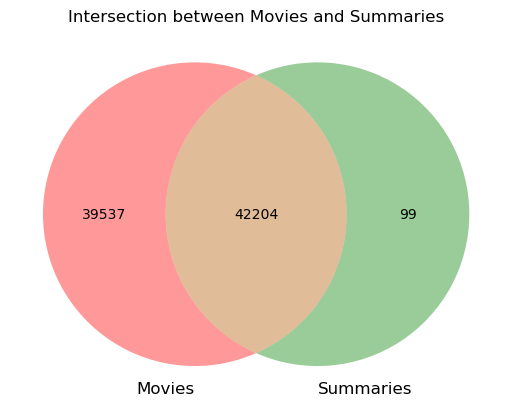

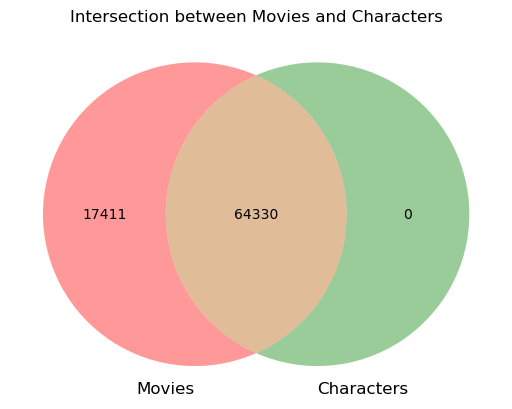

In [ ]:
intersectionWikiId(df_movies, df_summaries, 'Movies', 'Summaries', id_column='wiki_id')
intersectionWikiId(df_movies, df_characters, 'Movies', 'Characters', id_column='wiki_id')

### Economics

### Culture

### Population